In [51]:
#BOSTON House Price Prediction Using Linear Regression


In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression


In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='<U7')

In [5]:
boston.data.shape

(506, 13)

In [50]:
boston.DESCR

"Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n

In [24]:
bos = pd.DataFrame(boston.data)

In [35]:
bos.columns = boston.feature_names

In [36]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [37]:
boston.target.shape

(506,)

In [38]:
#bos['PRICE'] = boston.target

In [39]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [47]:
X = bos
Y = boston.target
#X = bos.drop('PRICE', axis = 1)
#Y = bos['PRICE']

C:\Users\khema\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [65]:
#Preparing test data set and train data set
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, Y, test_size = 0.4, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(303, 13)
(203, 13)
(303,)
(203,)


In [66]:
#fitting the data to linear regression
lm = LinearRegression()
lm.fit(X_train, Y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [67]:

Y_pred = lm.predict(X_test)


In [68]:
Y_pred

array([ 37.78027682,  30.7334829 ,  27.37516262,   7.10263217,
        34.22154586,   5.8799904 ,  26.77816137,  30.02467659,
        26.72375194,  22.31947276,  32.98845028,  21.68041491,
        23.10922174,  33.71468332,  28.11504404,  16.09948011,
         0.83962899,  17.69449633,  14.98496959,  10.05285706,
         3.91430682,  18.92047053,  38.98612987,  24.46273722,
        32.10298785,  11.57359018,  24.83377248,  23.55500853,
        22.65435092,  21.2593706 ,  16.23259188,   7.91865536,
        17.11214529,  23.31791972,  29.41820066,  18.4029659 ,
        28.56800428,   9.12158838,  42.23882044,  33.609832  ,
        19.71337562,   5.07046288,  29.53910515,  11.9987257 ,
        27.32144206,  30.92174203,  -5.45976568,  19.47274859,
        21.10952276,  14.23293096,  20.6848422 ,  20.31821658,
        23.81403423,  14.27942784,  17.11462321,  24.79919335,
        36.20880663,  15.5732636 ,  28.69195164,  22.1548163 ,
        20.76381167,  26.19087475,  14.34991376,  31.78

Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

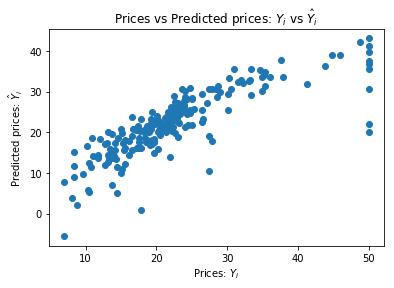

In [69]:
#Scatter plot to show the test vs predicted values
plt.scatter(Y_test, Y_pred)

plt.xlabel("Prices: $Y_i$")

plt.ylabel("Predicted prices: $\hat{Y}_i$")

plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [70]:
#calculating mean squared error to find the accuracy level
meanSquaredError = sklearn.metrics.mean_squared_error(Y_test, Y_pred)



In [71]:
meanSquaredError

29.048855051647667